In [2]:
import pandas as pd
import numpy as np

In [3]:
crime_police=pd.read_csv('data/police_2000_2020.csv', encoding='cp949')
crime_police.head(10)

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,3
3,중부,강도,검거,4
4,중부,"강간,추행",발생,113
5,중부,"강간,추행",검거,76
6,중부,절도,발생,943
7,중부,절도,검거,495
8,중부,폭력,발생,997
9,중부,폭력,검거,830


In [4]:
crime_police.head(20)

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,3
3,중부,강도,검거,4
4,중부,"강간,추행",발생,113
5,중부,"강간,추행",검거,76
6,중부,절도,발생,943
7,중부,절도,검거,495
8,중부,폭력,발생,997
9,중부,폭력,검거,830


In [5]:
crime_police.set_index(['구분', '죄종', '발생검거'], inplace = True)
crime_police.head(10)

건수
구분 죄종    발생검거     
중부 살인    발생      1
         검거      1
   강도    발생      3
         검거      4
   강간,추행 발생    113
         검거     76
   절도    발생    943
         검거    495
   폭력    발생    997
         검거    830

In [6]:
crime_police = crime_police.unstack(-1)  #unstack: index to col
crime_police.head(10)

건수      
발생검거        검거    발생
구분 죄종               
강남 강간,추행   433   513
   강도       10    12
   살인        3     5
   절도     1016  1941
   폭력     1911  2283
강동 강간,추행   167   188
   강도       14    15
   살인        3     3
   절도      781  1640
   폭력     1697  1942

In [7]:
crime_police = crime_police.unstack(-1)
crime_police.head(10)

건수                                                                    \
발생검거  검거                                     발생                              
죄종    강간  강간,추행    강도    살인      절도      폭력  강간  강간,추행    강도    살인      절도   
구분                                                                           
강남   NaN  433.0  10.0   3.0  1016.0  1911.0 NaN  513.0  12.0   5.0  1941.0   
강동   NaN  167.0  14.0   3.0   781.0  1697.0 NaN  188.0  15.0   3.0  1640.0   
강북   NaN  132.0   4.0   8.0   490.0  1625.0 NaN  159.0   5.0   9.0   780.0   
강서   NaN  222.0   5.0   9.0  1070.0  2087.0 NaN  265.0   6.0  10.0  1689.0   
관악   NaN  351.0   3.0  12.0  1137.0  2355.0 NaN  403.0   3.0  12.0  2229.0   
광진   NaN  224.0   4.0   2.0   874.0  1407.0 NaN  255.0   4.0   2.0  1664.0   
구로   NaN  142.0   5.0   6.0  1008.0  1823.0 NaN  197.0   5.0   6.0  1763.0   
금천   NaN   93.0   6.0   4.0   553.0  1310.0 NaN  117.0   7.0   4.0   999.0   
남대문  NaN   52.0   2.0   1.0   368.0   494.0 NaN   73.0   2.0   1.0   699.0   
노원   NaN  148.0   3.0   3.0   646.0  1781.0 NaN  169.0   3.0   4.0  1404.0   

              
발생검거          
죄종        폭력  
구분            
강남    2283.0  
강동    1942.0  
강북    1817.0  
강서    2445.0  
관악    2614.0  
광진    1676.0  
구로    2204.0  
금천    1471.0  
남대문    579.0  
노원    2163.0

In [8]:
crime_police = crime_police.droplevel(0, axis=1) #dropping 1 level on axis = 1
crime_police.head(10)

발생검거  검거                                     발생                             \
죄종    강간  강간,추행    강도    살인      절도      폭력  강간  강간,추행    강도    살인      절도   
구분                                                                           
강남   NaN  433.0  10.0   3.0  1016.0  1911.0 NaN  513.0  12.0   5.0  1941.0   
강동   NaN  167.0  14.0   3.0   781.0  1697.0 NaN  188.0  15.0   3.0  1640.0   
강북   NaN  132.0   4.0   8.0   490.0  1625.0 NaN  159.0   5.0   9.0   780.0   
강서   NaN  222.0   5.0   9.0  1070.0  2087.0 NaN  265.0   6.0  10.0  1689.0   
관악   NaN  351.0   3.0  12.0  1137.0  2355.0 NaN  403.0   3.0  12.0  2229.0   
광진   NaN  224.0   4.0   2.0   874.0  1407.0 NaN  255.0   4.0   2.0  1664.0   
구로   NaN  142.0   5.0   6.0  1008.0  1823.0 NaN  197.0   5.0   6.0  1763.0   
금천   NaN   93.0   6.0   4.0   553.0  1310.0 NaN  117.0   7.0   4.0   999.0   
남대문  NaN   52.0   2.0   1.0   368.0   494.0 NaN   73.0   2.0   1.0   699.0   
노원   NaN  148.0   3.0   3.0   646.0  1781.0 NaN  169.0   3.0   4.0  1404.0   

발생검거          
죄종        폭력  
구분            
강남    2283.0  
강동    1942.0  
강북    1817.0  
강서    2445.0  
관악    2614.0  
광진    1676.0  
구로    2204.0  
금천    1471.0  
남대문    579.0  
노원    2163.0

In [9]:
col_dict1 = ['검거nan','강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
col_dict2 = ['발생nan', '강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']
c1 = crime_police['검거'].rename(columns={crime_police['검거'].columns[i]:j for i, j in enumerate(col_dict1)})
c2 = crime_police['발생'].rename(columns={crime_police['발생'].columns[i]:j for i, j in enumerate(col_dict2)})
crime_police = pd.merge(c1, c2, on='구분')
crime_police.head()

죄종,검거nan,강간검거,강도검거,살인검거,절도검거,폭력검거,발생nan,강간발생,강도발생,살인발생,절도발생,폭력발생
구분,,,,,,,,,,,,
강남,NaN,433.0,10.0,3.0,1016.0,1911.0,NaN,513.0,12.0,5.0,1941.0,2283.0
강동,NaN,167.0,14.0,3.0,781.0,1697.0,NaN,188.0,15.0,3.0,1640.0,1942.0
강북,NaN,132.0,4.0,8.0,490.0,1625.0,NaN,159.0,5.0,9.0,780.0,1817.0
강서,NaN,222.0,5.0,9.0,1070.0,2087.0,NaN,265.0,6.0,10.0,1689.0,2445.0
관악,NaN,351.0,3.0,12.0,1137.0,2355.0,NaN,403.0,3.0,12.0,2229.0,2614.0


In [10]:
crime_police.drop(['검거nan', '발생nan'], axis= 1, inplace = True)
crime_police.head()

죄종,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생
구분,,,,,,,,,,
강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0
강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0
강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0
강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0
관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0


In [11]:
#conda install googlemaps  -> 레포에 없다는 에러
#https://anaconda.org/conda-forge/googlemaps참고
# conda install -c conda-forge googlemaps
import googlemaps

In [12]:
gmaps_key = ##

In [13]:
gmaps = googlemaps.Client(key=gmaps_key)

In [14]:
print(dir(gmaps))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_generate_auth_url', '_get', '_get_body', '_request', 'channel', 'client_id', 'client_secret', 'directions', 'distance_matrix', 'elevation', 'elevation_along_path', 'geocode', 'geolocate', 'key', 'nearest_roads', 'place', 'places', 'places_autocomplete', 'places_autocomplete_query', 'places_nearby', 'places_photo', 'places_radar', 'queries_per_second', 'requests_kwargs', 'retry_timeout', 'reverse_geocode', 'sent_times', 'session', 'snap_to_roads', 'snapped_speed_limits', 'speed_limits', 'timeout', 'timezone']


In [15]:
gmaps.geocode('서울중부경찰서', language = 'ko') #조회하는 글자가 한국어, 배열타입

[{'address_components': [{'long_name': '27',
    'short_name': '27',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 수표로 27',
  'geometry': {'location': {'lat': 37.56361709999999, 'lng': 126.9896517},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5649660802915,
     'lng': 126.9910006802915},
    'southwest': {'lat': 37.5622681197085, 'lng': 126.9883027197085}}},
  'partial_match': True,
  'place_id': 'ChIJc-9q5uSifDURLhQmr5wkXmc',
 

In [16]:
#formatted_address, geometry
#from tqdm.notebook import tqdm

station_name = []
for name in crime_police.index:
    station_name.append('서울' + str(name) + '경찰서')
    
station_name
#conda install tqdm

['서울강남경찰서',
 '서울강동경찰서',
 '서울강북경찰서',
 '서울강서경찰서',
 '서울관악경찰서',
 '서울광진경찰서',
 '서울구로경찰서',
 '서울금천경찰서',
 '서울남대문경찰서',
 '서울노원경찰서',
 '서울도봉경찰서',
 '서울동대문경찰서',
 '서울동작경찰서',
 '서울마포경찰서',
 '서울방배경찰서',
 '서울서대문경찰서',
 '서울서부경찰서',
 '서울서초경찰서',
 '서울성동경찰서',
 '서울성북경찰서',
 '서울송파경찰서',
 '서울수서경찰서',
 '서울양천경찰서',
 '서울영등포경찰서',
 '서울용산경찰서',
 '서울은평경찰서',
 '서울종로경찰서',
 '서울종암경찰서',
 '서울중랑경찰서',
 '서울중부경찰서',
 '서울혜화경찰서']

In [17]:
print(len(station_name))

31


In [18]:
from tqdm.notebook import tqdm #로딩표시
station_address = []
station_lat = []
station_lng = []
for name in tqdm(station_name): 
    tmp = gmaps.geocode(name, language = 'ko')
    station_address.append(tmp[0].get('formatted_address'))
    
    station_lat.append(tmp[0].get('geometry')['location']['lat'])
    station_lng.append(tmp[0].get('geometry')['location']['lng'])
    print(name + ':' + tmp[0].get('formatted_address'))

  0%|          | 0/31 [00:00<?, ?it/s]

서울강남경찰서:대한민국 서울특별시 강남구 테헤란로114길 11
서울강동경찰서:대한민국 서울특별시 강동구 성내로 57
서울강북경찰서:대한민국 서울특별시 강북구 오패산로 406
서울강서경찰서:대한민국 서울특별시 양천구 신월동 화곡로 73
서울관악경찰서:대한민국 서울특별시 관악구 관악로5길 33
서울광진경찰서:대한민국 서울특별시 광진구 구의동 자양로 167
서울구로경찰서:대한민국 서울특별시 구로구 새말로 97 신도림테크노마트 5층
서울금천경찰서:대한민국 서울특별시 금천구 시흥대로73길 50
서울남대문경찰서:대한민국 서울특별시 중구 한강대로 410
서울노원경찰서:대한민국 서울특별시 노원구 노원로 283
서울도봉경찰서:대한민국 서울특별시 도봉구 노해로 403
서울동대문경찰서:대한민국 서울특별시 동대문구 약령시로21길 29
서울동작경찰서:대한민국 서울특별시 동작구 노량진로 148
서울마포경찰서:대한민국 서울특별시 마포구 마포대로 183
서울방배경찰서:대한민국 서울특별시 서초구 동작대로 204
서울서대문경찰서:대한민국 서울특별시 서대문구 통일로 113
서울서부경찰서:대한민국 서울특별시 은평구 진흥로 58
서울서초경찰서:대한민국 서울특별시 서초구 서초3동 반포대로 179
서울성동경찰서:대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울성북경찰서:대한민국 서울특별시 성북구 삼선동 보문로 170
서울송파경찰서:대한민국 서울특별시 송파구 중대로 221
서울수서경찰서:대한민국 서울특별시 강남구 개포로 617
서울양천경찰서:대한민국 서울특별시 양천구 목동동로 99
서울영등포경찰서:대한민국 서울특별시 영등포구 국회대로 608
서울용산경찰서:대한민국 서울특별시 용산구 백범로 329
서울은평경찰서:대한민국 서울특별시 은평구 연서로 365
서울종로경찰서:대한민국 서울특별시 종로구 인사동5길 41
서울종암경찰서:대한민국 서울특별시 종암경찰서
서울중랑경찰서:대한민국 서울특별시 중랑구 묵제2동 249-2
서울중부경찰서:대한민국 서울특별시 중구 수표로 27
서울혜화경찰서:대한민국 서울특별시 종

In [19]:
print(len(station_address), len(station_lat), len(station_lng))

31 31 31


In [20]:
print(station_lat[:10])

[37.5094352, 37.528511, 37.63719740000001, 37.5397827, 37.4743945, 37.5428231, 37.5074418, 37.4568129, 37.5547584, 37.6421389]


In [21]:
print(station_lng[:10])

[127.0669578, 127.1268224, 127.0273048, 126.8299968, 126.9513489, 127.0838395, 126.8902237, 126.8968061, 126.9734981, 127.0710473]


In [22]:
crime_police.head()

죄종,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생
구분,,,,,,,,,,
강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0
강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0
강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0
강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0
관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0


In [23]:
station_address[-4] = '대한민국 서울특별시 성북구 월곡제2동 94-5'

In [24]:
gu_name = []
for name in station_address:
    tmp = name.split()
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    gu_name.append(tmp_gu)

crime_police['구별'] = gu_name
crime_police

죄종,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별
구분,,,,,,,,,,,
강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0,강남구
강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0,강동구
강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0,강북구
강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0,양천구
관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0,관악구
광진,224.0,4.0,2.0,874.0,1407.0,255.0,4.0,2.0,1664.0,1676.0,광진구
구로,142.0,5.0,6.0,1008.0,1823.0,197.0,5.0,6.0,1763.0,2204.0,구로구
금천,93.0,6.0,4.0,553.0,1310.0,117.0,7.0,4.0,999.0,1471.0,금천구
남대문,52.0,2.0,1.0,368.0,494.0,73.0,2.0,1.0,699.0,579.0,중구


In [25]:
crime_police.reset_index(drop = False, inplace = True)
crime_police

죄종,구분,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별
0,강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0,강남구
1,강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0,강동구
2,강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0,강북구
3,강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0,양천구
4,관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0,관악구
5,광진,224.0,4.0,2.0,874.0,1407.0,255.0,4.0,2.0,1664.0,1676.0,광진구
6,구로,142.0,5.0,6.0,1008.0,1823.0,197.0,5.0,6.0,1763.0,2204.0,구로구
7,금천,93.0,6.0,4.0,553.0,1310.0,117.0,7.0,4.0,999.0,1471.0,금천구
8,남대문,52.0,2.0,1.0,368.0,494.0,73.0,2.0,1.0,699.0,579.0,중구
9,노원,148.0,3.0,3.0,646.0,1781.0,169.0,3.0,4.0,1404.0,2163.0,노원구


In [26]:
crime_police.loc[crime_police['구분'] == '도봉', '강간검거'] = 87
crime_police.loc[crime_police['구분'] == '도봉', '강간발생'] = 82
crime_police.loc[crime_police['구분'] == '방배', '강간검거'] = 50
crime_police.loc[crime_police['구분'] == '방배', '강간발생'] = 63
crime_police.loc[crime_police['구분'] == '성북', '강간검거'] = 77
crime_police.loc[crime_police['구분'] == '성북', '강간발생'] = 95
crime_police.loc[crime_police['구분'] == '양천', '강간검거'] = 90
crime_police.loc[crime_police['구분'] == '양천', '강간발생'] = 109
crime_police.loc[crime_police['구분'] == '종암', '강간검거'] = 44
crime_police.loc[crime_police['구분'] == '종암', '강간발생'] = 47

In [27]:
crime_police

죄종,구분,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별
0,강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0,강남구
1,강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0,강동구
2,강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0,강북구
3,강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0,양천구
4,관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0,관악구
5,광진,224.0,4.0,2.0,874.0,1407.0,255.0,4.0,2.0,1664.0,1676.0,광진구
6,구로,142.0,5.0,6.0,1008.0,1823.0,197.0,5.0,6.0,1763.0,2204.0,구로구
7,금천,93.0,6.0,4.0,553.0,1310.0,117.0,7.0,4.0,999.0,1471.0,금천구
8,남대문,52.0,2.0,1.0,368.0,494.0,73.0,2.0,1.0,699.0,579.0,중구
9,노원,148.0,3.0,3.0,646.0,1781.0,169.0,3.0,4.0,1404.0,2163.0,노원구


In [28]:
crime_anal = pd.pivot_table(crime_police, index = '구별', aggfunc = np.sum)
crime_anal

C:\Users\BIT\AppData\Local\Temp\ipykernel_9156\2715135399.py:1: FutureWarning: The operation <function sum at 0x000001D06EBF6040> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  crime_anal = pd.pivot_table(crime_police, index = '구별', aggfunc = np.sum)


죄종,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,627.0,708.0,11.0,14.0,5.0,6.0,1491.0,2951.0,3111.0,3677.0
강동구,167.0,188.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0
강북구,132.0,159.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0
관악구,351.0,403.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0
광진구,224.0,255.0,4.0,4.0,2.0,2.0,874.0,1664.0,1407.0,1676.0
구로구,142.0,197.0,5.0,5.0,6.0,6.0,1008.0,1763.0,1823.0,2204.0
금천구,93.0,117.0,6.0,7.0,4.0,4.0,553.0,999.0,1310.0,1471.0
노원구,148.0,169.0,3.0,3.0,3.0,4.0,646.0,1404.0,1781.0,2163.0
도봉구,87.0,82.0,2.0,2.0,0.0,0.0,379.0,861.0,1022.0,1234.0


In [29]:
crime_anal['강간검거율'] = crime_anal['강간검거']/crime_anal['강간발생']*100
crime_anal['강도검거율'] = crime_anal['강도검거']/crime_anal['강도발생']*100
crime_anal['살인검거율'] = crime_anal['살인검거']/crime_anal['살인발생']*100
crime_anal['절도검거율'] = crime_anal['절도검거']/crime_anal['절도발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력검거']/crime_anal['폭력발생']*100

In [30]:
crime_anal.head()

죄종,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,627.0,708.0,11.0,14.0,5.0,6.0,1491.0,2951.0,3111.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,167.0,188.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,132.0,159.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,351.0,403.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,224.0,255.0,4.0,4.0,2.0,2.0,874.0,1664.0,1407.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881


In [31]:
del crime_anal['강간검거']
del crime_anal['강도검거']
del crime_anal['살인검거']
del crime_anal['절도검거']
del crime_anal['폭력검거']

In [32]:
crime_anal.head()

죄종,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255.0,4.0,2.0,1664.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881


In [33]:
crime_anal

죄종,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255.0,4.0,2.0,1664.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197.0,5.0,6.0,1763.0,2204.0,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117.0,7.0,4.0,999.0,1471.0,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169.0,3.0,4.0,1404.0,2163.0,87.573964,100.000000,75.000000,46.011396,82.339344
도봉구,82.0,2.0,0.0,861.0,1234.0,106.097561,100.000000,NaN,44.018583,82.820097


In [34]:
crime_anal = crime_anal.fillna(0)
crime_anal

죄종,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255.0,4.0,2.0,1664.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197.0,5.0,6.0,1763.0,2204.0,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117.0,7.0,4.0,999.0,1471.0,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169.0,3.0,4.0,1404.0,2163.0,87.573964,100.000000,75.000000,46.011396,82.339344
도봉구,82.0,2.0,0.0,861.0,1234.0,106.097561,100.000000,0.000000,44.018583,82.820097


col_list = ['강간검거율', '강도검거율', '살인검거율', 
            '절도검거율', '폭력검거율']
for column in col_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal

In [36]:
crime_anal.rename(columns = {'강간발생':'강간', 
                             '강도발생':'강도', 
                             '살인발생':'살인', 
                             '절도발생':'절도', 
                             '폭력발생':'폭력'}, inplace=True)
crime_anal.head()

죄종,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255.0,4.0,2.0,1664.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881


In [37]:
crime_anal

죄종,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255.0,4.0,2.0,1664.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197.0,5.0,6.0,1763.0,2204.0,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117.0,7.0,4.0,999.0,1471.0,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169.0,3.0,4.0,1404.0,2163.0,87.573964,100.000000,75.000000,46.011396,82.339344
도봉구,82.0,2.0,0.0,861.0,1234.0,100.000000,100.000000,0.000000,44.018583,82.820097


In [38]:
#min max scaling: xi = xnew - xmin / xmax - xmin
#conda install scikit-learn
from sklearn import preprocessing

In [39]:
col = ['강간', '강도', '살인', '절도', '폭력']
x = crime_anal[col].values

In [40]:
print(type(x)) #넘파이배열

<class 'numpy.ndarray'>


In [41]:
print(x.dtype)

float64


In [42]:
print(x[:3])

[[7.080e+02 1.400e+01 6.000e+00 2.951e+03 3.677e+03]
 [1.880e+02 1.500e+01 3.000e+00 1.640e+03 1.942e+03]
 [1.590e+02 5.000e+00 9.000e+00 7.800e+02 1.817e+03]]


In [43]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled[:3])

[[1.         0.92857143 0.4        0.89488871 0.87517832]
 [0.16932907 1.         0.2        0.35449299 0.2564194 ]
 [0.12300319 0.28571429 0.6        0.         0.21184023]]


In [44]:
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, 
                              index = crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178
강동구,0.169329,1.000000,0.200000,0.354493,0.256419
강북구,0.123003,0.285714,0.600000,0.000000,0.211840
관악구,0.512780,0.142857,0.800000,0.597279,0.496077
광진구,0.276358,0.214286,0.133333,0.364386,0.161555
구로구,0.183706,0.285714,0.400000,0.405194,0.349857
금천구,0.055911,0.428571,0.266667,0.090272,0.088445
노원구,0.138978,0.142857,0.266667,0.257214,0.335235
도봉구,0.000000,0.071429,0.000000,0.033388,0.003923


In [45]:
col2 = ['강간검거율', '강도검거율', '살인검거율', 
         '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,0.169329,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,0.123003,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,0.512780,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,0.276358,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881


In [46]:
result_cctv = pd.read_csv('data/cctv_pop_seoul.csv', index_col = '구별')
result_cctv.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1729,47.148936,156567,147296,9271,27781,5.921427,17.743841
중구,2001,205.963303,133708,124552,9156,24767,6.847758,18.523200
용산구,2383,247.883212,243336,229013,14323,39575,5.886100,16.263520
성동구,3515,172.692009,298421,291906,6515,45968,2.183157,15.403742
광진구,2556,435.849057,356191,343392,12799,50370,3.593297,14.141289


In [47]:
crime_anal_norm[['인구수', 'cctv']] = result_cctv[['인구수', '총계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv
구별,,,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645
강동구,0.169329,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547
강북구,0.123003,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462
관악구,0.512780,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909
광진구,0.276358,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556


In [48]:
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.098638
강동구,0.169329,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,1.980241
강북구,0.123003,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.220558
관악구,0.512780,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.548993
광진구,0.276358,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,1.149918


In [70]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,0.163946,385.596346
강동구,0.169329,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,0.079210,417.169212
강북구,0.123003,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,0.048822,404.161401
관악구,0.512780,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,0.101960,428.198009
광진구,0.276358,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,0.045997,424.317056


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#한글 처리 코드
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin': #macos
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #windows os
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

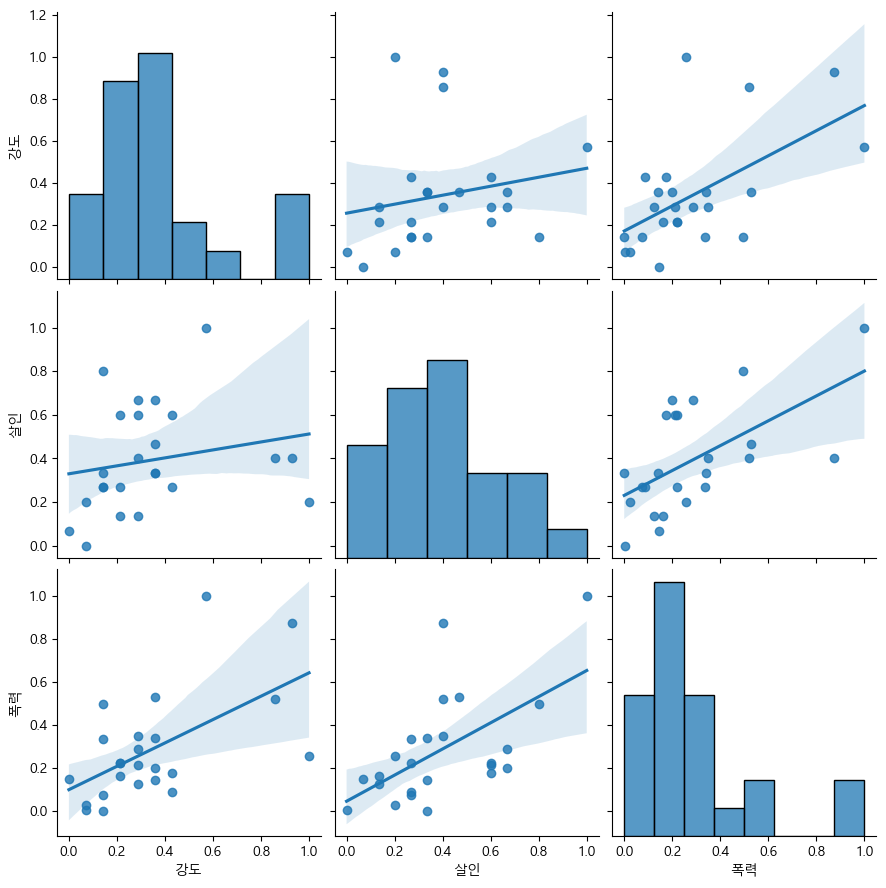

In [52]:
sns.pairplot(crime_anal_norm, vars = ['강도', '살인', '폭력'], kind = 'reg', height= 3)
plt.show()

c:\Users\BIT\AppData\Local\miniconda3\envs\p39-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\BIT\AppData\Local\miniconda3\envs\p39-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


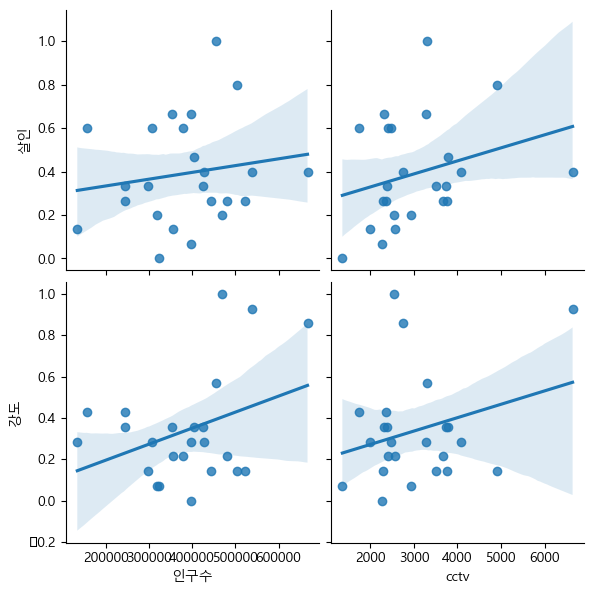

In [53]:
sns.pairplot(crime_anal_norm, x_vars= ['인구수', 'cctv'],
             y_vars= ['살인', '강도'], kind= 'reg', height= 3)
plt.yticks(fontname = 'Glyph 8722')
plt.show()

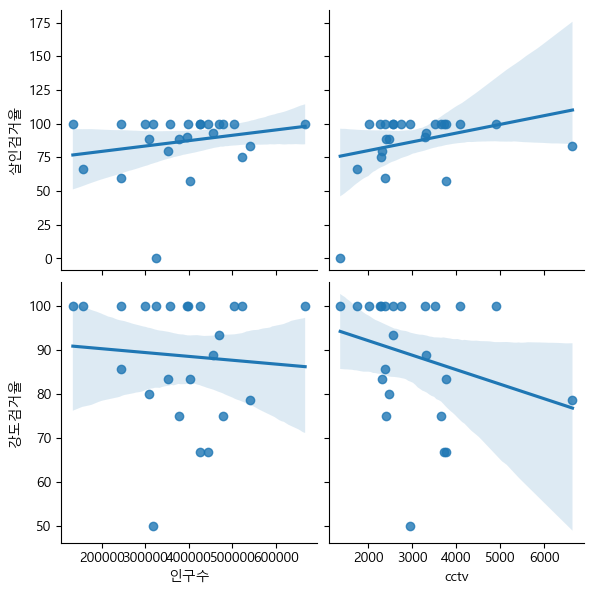

In [54]:
sns.pairplot(crime_anal_norm, x_vars= ['인구수', 'cctv'],
             y_vars= ['살인검거율', '강도검거율'], kind= 'reg', height= 3)
plt.yticks(fontname = 'Glyph 8722')
plt.show()

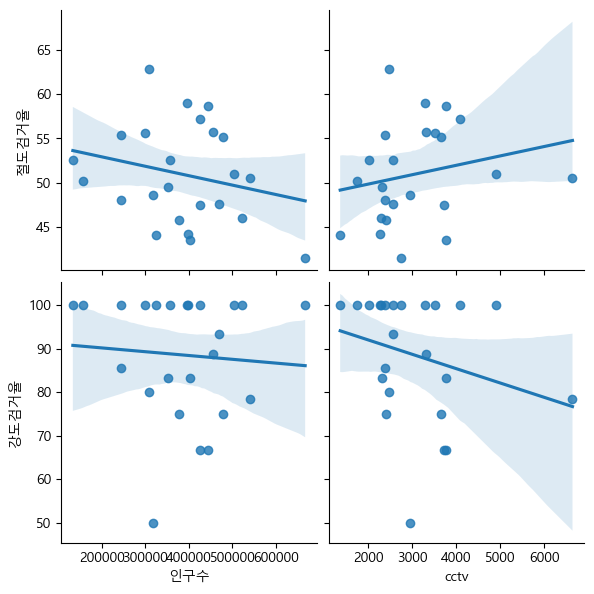

In [55]:
sns.pairplot(crime_anal_norm, x_vars= ['인구수', 'cctv'],
             y_vars= ['절도검거율', '강도검거율'], kind= 'reg', height= 3)
plt.yticks(fontname = 'Glyph 8722')
plt.show()

In [56]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.098638,385.596346
강동구,0.169329,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,1.980241,417.169212
강북구,0.123003,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.220558,404.161401
관악구,0.512780,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.548993,428.198009
광진구,0.276358,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,1.149918,424.317056


In [57]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by ='검거', ascending= False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
성동구,0.052716,0.142857,0.333333,0.097279,0.000000,85.217391,100.000000,100.0,55.610236,90.188062,298421,3515,0.626186,100.000000
관악구,0.512780,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.0,51.009421,90.091813,504140,4909,2.548993,99.346270
광진구,0.276358,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.0,52.524038,83.949881,356191,2556,1.149918,98.445849
중랑구,0.161342,0.285714,0.666667,0.299258,0.284950,83.606557,100.000000,90.0,59.030544,85.262117,396807,3285,1.697931,96.956846
강동구,0.169329,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.0,47.621951,87.384140,468815,2547,1.980241,96.787477


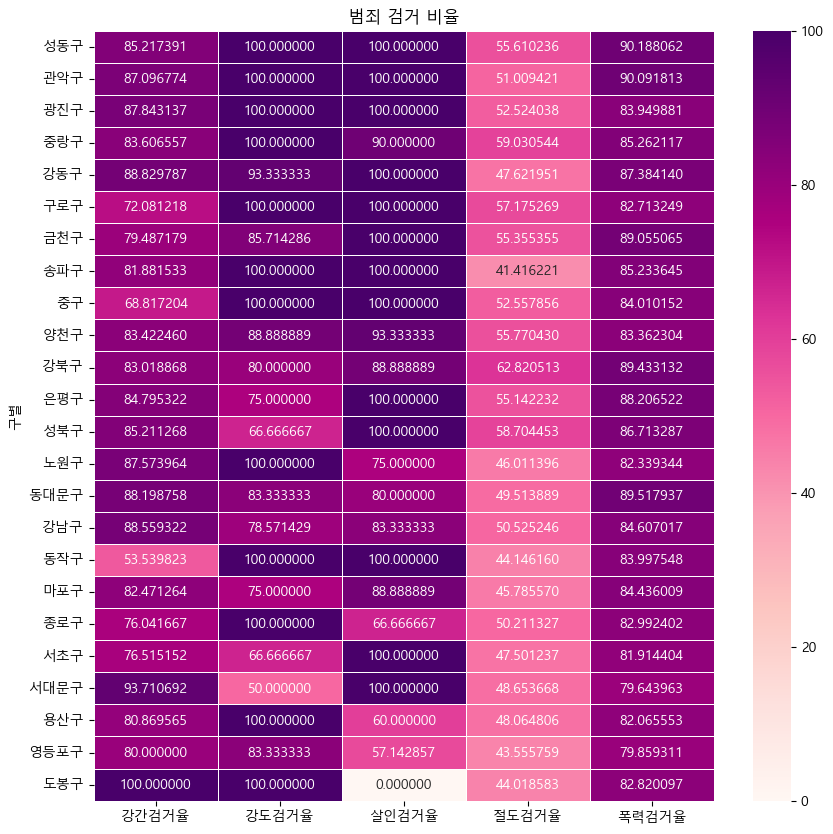

In [61]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
plt.figure(figsize=(10, 10))
sns.heatmap(crime_anal_norm_sort[target_col], annot = True, fmt= 'f', linewidths= 0.5, cmap= 'RdPu')
plt.title('범죄 검거 비율')
plt.show()

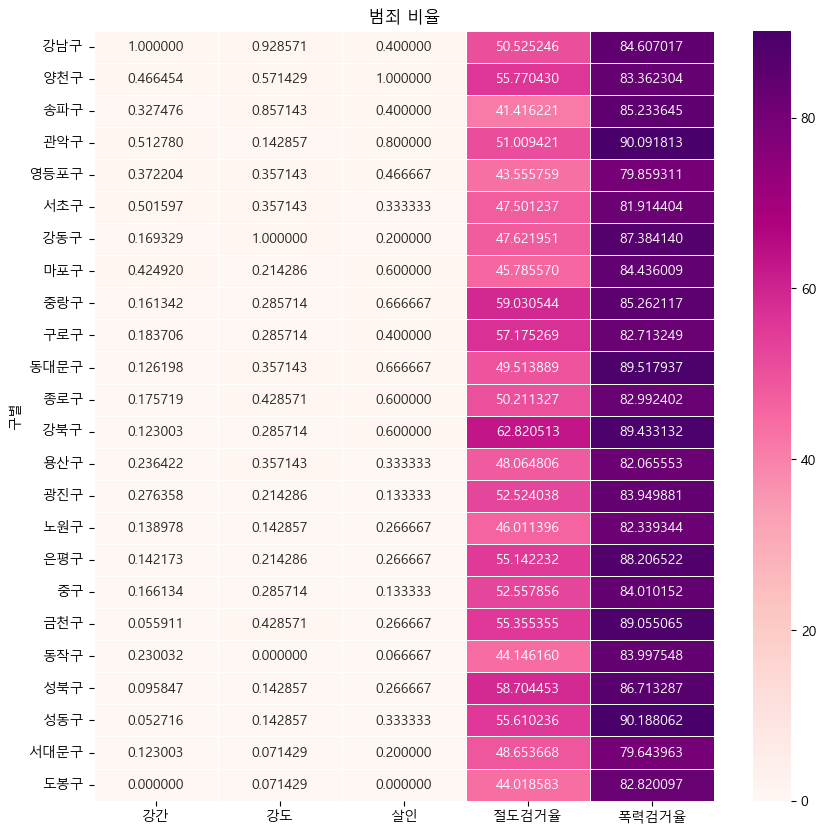

In [62]:
target_col = ['강간', '강도', '살인', '절도검거율', '폭력검거율']
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by = '범죄', ascending = False)
plt.figure(figsize=(10, 10))
sns.heatmap(crime_anal_norm_sort[target_col], annot = True, fmt= 'f', linewidths= 0.5, cmap= 'RdPu')
plt.title('범죄 비율')
plt.show()

In [63]:
import folium
import json

In [64]:
geo_path = 'data/seoul_geo.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [71]:
gmaps.geocode('서울강서경찰서', language= 'ko')

[{'address_components': [{'long_name': '73',
    'short_name': '73',
    'types': ['premise']},
   {'long_name': '화곡로',
    'short_name': '화곡로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '신월동',
    'short_name': '신월동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '양천구',
    'short_name': '양천구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '07902', 'short_name': '07902', 'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 양천구 신월동 화곡로 73',
  'geometry': {'location': {'lat': 37.5397827, 'lng': 126.8299968},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.54113168029149,
     'lng': 126.8313457802915},
    'southwest': {'lat': 37.5384337197

In [68]:
map = folium.Map(location = [37.5502, 126.982], zoom_start= 11)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm['살인'], #default로 index를 뽑아가고 값을 사용함
    fill_color='PuRd', #from purple to red --> https://matplotlib.org/stable/tutorials/colors/colormaps.html
    key_on='feature.id',
    legend_name = '살인 비율'
).add_to(map)

map

In [73]:
map = folium.Map(location = [37.5502, 126.982], zoom_start= 11)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm['범죄'], #default로 index를 뽑아가고 값을 사용함
    fill_color='PuRd', #from purple to red --> https://matplotlib.org/stable/tutorials/colors/colormaps.html
    key_on='feature.id',
    legend_name = '범죄 비율'
).add_to(map)

map

In [87]:
map = folium.Map(location = [37.5502, 126.982], zoom_start= 11)
tmp_criminal = crime_anal_norm['살인'] / crime_anal_norm['인구수'] * 100000

folium.Choropleth(
    geo_data = geo_str,
    data = tmp_criminal,
    fill_color='PuRd', 
    key_on='feature.id',
    legend_name = '범죄 비율'
).add_to(map)

map

In [86]:
map = folium.Map(location = [37.5502, 126.982], zoom_start= 11)
tmp_criminal = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 100000

folium.Choropleth(
    geo_data = geo_str,
    data = tmp_criminal,
    fill_color='PuRd', 
    key_on='feature.id',
    legend_name = '범죄 비율'
).add_to(map)

map

In [85]:
map = folium.Map(location = [37.5502, 126.982], zoom_start= 11)
folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm['검거'],
    fill_color='PuRd', 
    key_on='feature.id',
    legend_name = '검거 비율'
).add_to(map)

map

In [88]:
crime_police['lat'] = station_lat
crime_police['lng'] = station_lng

target_col = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
tmp = crime_police[target_col] / crime_police[target_col].max()
crime_police['검거'] = np.sum(tmp, axis = 1)
crime_police.head()

죄종,구분,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별,lat,lng,검거
0,강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0,강남구,37.509435,127.066958,3.543280
1,강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0,강동구,37.528511,127.126822,2.866701
2,강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0,강북구,37.637197,127.027305,2.327791
3,강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0,양천구,37.539783,126.829997,3.384092
4,관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0,관악구,37.474395,126.951349,3.987094


In [90]:
map = folium.Map(location = [37.5502, 126.982], zoom_start= 11)

for n in crime_police.index:
    folium.Marker([crime_police['lat'][n], crime_police['lng'][n]]).add_to(map)

map

In [91]:
map = folium.Map(location = [37.5502, 126.982], zoom_start= 11)

for n in crime_police.index:
    folium.CircleMarker([crime_police['lat'][n], crime_police['lng'][n]],
                        radius= crime_police['검거'][n]*10,
                        color = '#3186cc',
                        fill_color = '#3186cc',
                        fill = True).add_to(map)

map

In [92]:
map = folium.Map(location = [37.5502, 126.982], zoom_start= 11)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm['검거'],
    fill_color='PuRd', 
    key_on='feature.id',
    legend_name = '검거 비율'
).add_to(map)

for n in crime_police.index:
    folium.CircleMarker([crime_police['lat'][n], crime_police['lng'][n]],
                        radius= crime_police['검거'][n]*10,
                        color = '#3186cc',
                        fill_color = '#3186cc',
                        fill = True).add_to(map)

map